In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**VH FN evaluation**

In [53]:
#reading the df
vh_class_df = pd.read_csv('/content/benchmark_set_vh_class.tsv', sep='\t', header=0)

#separating the FN entries from the rest of the df
vh_fn = vh_class_df.query('Classification=="FN"')[['UniProtKB accession','Sequence (first 50 N-terminal residues)', 'SP cleavage-site annotation', 'Kingdom']] #should be 60
vh_fn_len = vh_fn['SP cleavage-site annotation'].str.count('S')
align_site = []
for seq, len in zip(vh_fn['Sequence (first 50 N-terminal residues)'], vh_fn_len):
  align_site.append(seq[len - 13:len + 2])
  #print(seq[len - 13:len + 2])

In [12]:
#separating the TP entries from the rest of the df
vh_tp = vh_class_df.query('Classification=="TP"')[['Sequence (first 50 N-terminal residues)', 'SP cleavage-site annotation', 'Kingdom']] #should be 149
vh_tp_len = vh_tp['SP cleavage-site annotation'].str.count('S')
align_site = []
for seq, len in zip(vh_tp['Sequence (first 50 N-terminal residues)'], vh_tp_len):
  align_site.append(seq[len - 13:len + 2])
  #print(seq[len - 13:len + 2])

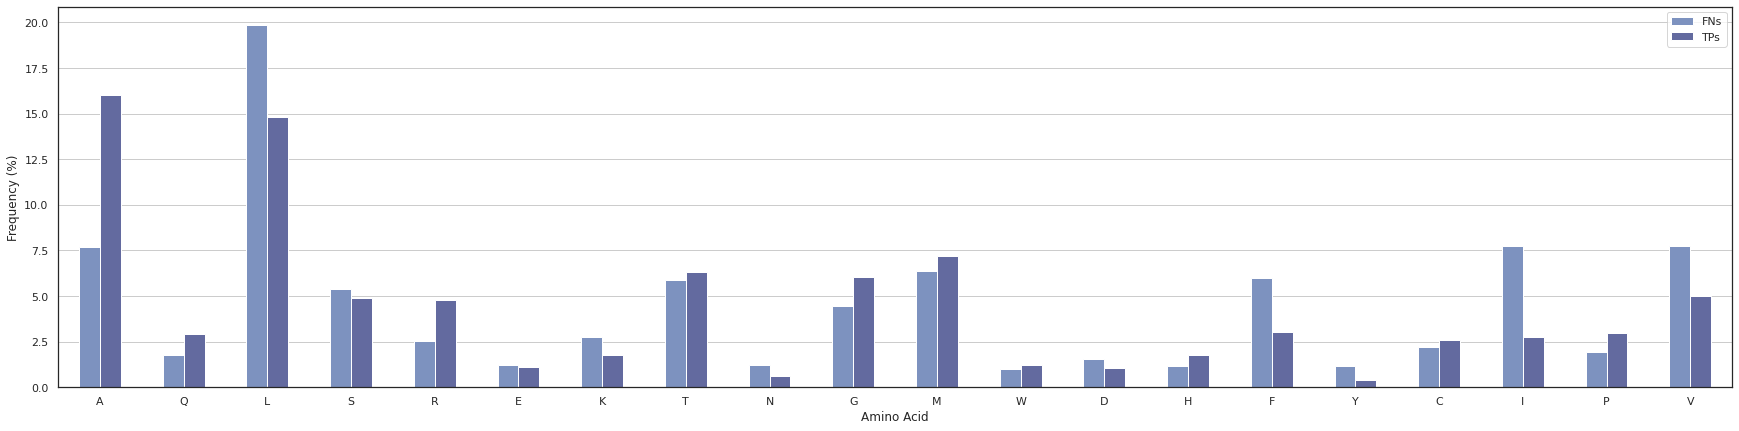

In [7]:
#Evaluation of the composition of SVM FNs wrt to the benchmark composition 
aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']
aa_background_comp = [8.25,3.93,9.65,6.64,5.53,6.72,5.80,5.35,4.06,7.07,2.41,1.10,5.46,2.27,3.86,2.92,1.38,5.91,4.74,6.86]

#creating a new column in the df with the sequence of the SP
for n in list(vh_fn_len):
  vh_fn['SP sequence'] = vh_fn['Sequence (first 50 N-terminal residues)'].str[:n+1]
#creating a new column to store the previous results
for aa, n in zip(aa_list, list(vh_fn_len)):
  vh_fn[aa] = vh_fn['SP sequence'].str.count(aa)/n

#creating a new column in the dataframe with the sequence of the SP
for n in list(vh_tp_len):
  vh_tp['SP sequence'] = vh_tp['Sequence (first 50 N-terminal residues)'].str[:n+1]
#i create a new column for each aa with the freq in the SP
for aa,n in zip(aa_list, list(vh_tp_len)):
  vh_tp[aa] = vh_tp['SP sequence'].str.count(aa)/n

fn_aa_comp_list = []
for aa in aa_list:
  fn_aa_comp_list.append(vh_fn[aa].mean()*100)
tp_aa_comp_list = []
for aa in aa_list:
  tp_aa_comp_list.append(vh_tp[aa].mean()*100)

aa_array = np.array(aa_list)
fn_aa_comp_array = np.array(fn_aa_comp_list)
tp_aa_comp_array = np.array(tp_aa_comp_list)
comp = pd.DataFrame(data=[fn_aa_comp_array, tp_aa_comp_array], columns=aa_array, index=['FNs', 'TPs']).transpose()

sns.set_theme(style='white')
colors = sns.color_palette("ch:s=.25,rot=-.25")[2:5]
ax = comp.plot.bar(figsize=(30, 7), ylabel='Frequency (%)', color=colors, xlabel='Amino Acid', rot=0)
ax.grid(axis='y')

Metazoa    47
Fungi       7
Plants      4
Other       1
Name: Kingdom, dtype: int64

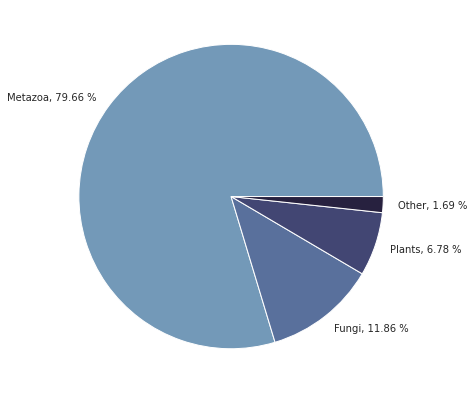

In [26]:
#vh FNs kingdom evaluation
plt.figure(figsize=(7,7))
colors = sns.color_palette("ch:start=.2,rot=-.3")[2:6]
percents = vh_fn['Kingdom'].value_counts().to_numpy() * 100 / vh_fn['Kingdom'].value_counts().to_numpy().sum()
legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(vh_fn['Kingdom'].unique(), percents)]
font = {'fontname': 'Times New Roman'}
explode = (0,0,0)

vh_fn['Kingdom'].value_counts().plot(kind='pie', figsize=(7,7), subplots=True, labels=legend, ylabel=' ', colors=colors, legend=False, fontsize=10)
vh_fn['Kingdom'].value_counts()

Metazoa    3457
Plants     1833
Fungi      1709
Other       109
Name: Kingdom, dtype: int64

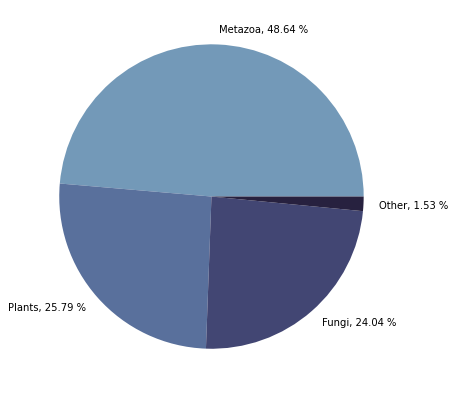

In [ ]:
#vh TNs kingdom evaluation
vh_tn = vh_class_df.query('Classification=="TN"')['Kingdom']
plt.figure(figsize=(7,7))
colors = sns.color_palette("ch:start=.2,rot=-.3")[2:6]
percents = vh_tn.value_counts().to_numpy() * 100 / vh_tn.value_counts().to_numpy().sum()
legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(vh_tn.unique(), percents)]
font = {'fontname': 'Times New Roman'}
explode = (0,0,0)

vh_tn.value_counts().plot(kind='pie', figsize=(7,7), subplots=True, labels=legend, ylabel=' ', colors=colors, legend=False, fontsize=10)
vh_tn.value_counts()

**SVM FN evaluation**

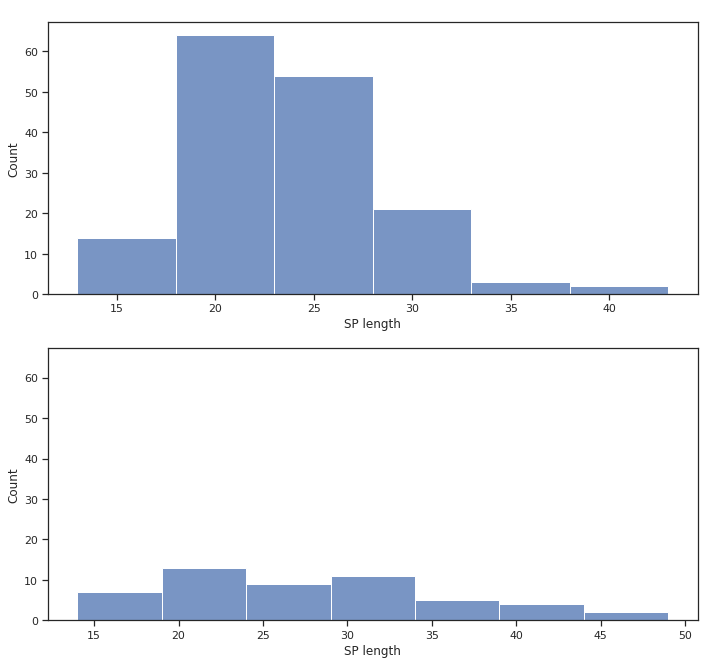

In [ ]:
#SVM FNs length distribution by histos
svm_class_df = pd.read_csv('/content/benchmark_set_svm_class.tsv', sep='\t', header=0)
svm_fn = svm_class_df.query('Classification=="FN"')[['Sequence (first 50 N-terminal residues)', 'SP cleavage-site annotation', 'Kingdom']] #should be 51
svm_fn_len = svm_fn['SP cleavage-site annotation'].str.count('S')

#SVM TP length distribution by histos
svm_tp = svm_class_df.query('Classification=="TP"')[['Sequence (first 50 N-terminal residues)', 'SP cleavage-site annotation', 'Kingdom']] #should be 158
svm_tp_len = svm_tp['SP cleavage-site annotation'].str.count('S')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(11.65, 11), sharey=True) 
sns.set_theme(style="ticks")
sns.histplot(data=svm_fn_len, binwidth=5).set(title=' ', xlabel='SP length')
sns.histplot(data=svm_tp_len, binwidth=5, ax=ax1).set(title=' ', xlabel='SP length')
plt.show()

In [ ]:
#statistical comparison 
print(svm_fn_len.describe())
print()
print(svm_tp_len.describe())

count    51.000000
mean     27.117647
std       8.281659
min      14.000000
25%      20.000000
50%      27.000000
75%      32.000000
max      46.000000
Name: SP cleavage-site annotation, dtype: float64

count    158.000000
mean      23.253165
std        4.924832
min       13.000000
25%       20.000000
50%       23.000000
75%       26.000000
max       42.000000
Name: SP cleavage-site annotation, dtype: float64


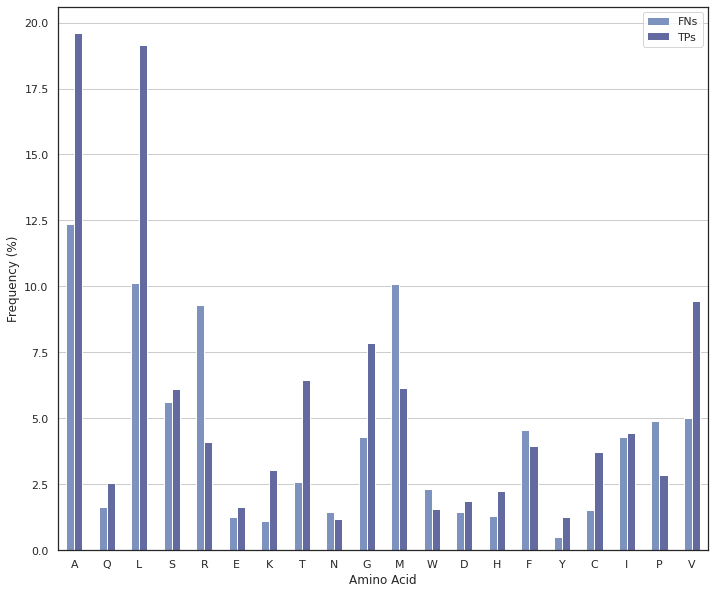

In [ ]:
#Evaluation of the composition of SVM FNs wrt to the benchmark composition 
aa_list=['A','Q','L','S','R','E','K','T','N','G','M','W','D','H','F','Y','C','I','P','V']
aa_background_comp = [8.25,3.93,9.65,6.64,5.53,6.72,5.80,5.35,4.06,7.07,2.41,1.10,5.46,2.27,3.86,2.92,1.38,5.91,4.74,6.86]

#creating a new column in the df with the sequence of the SP
for n in list(svm_fn_len):
  svm_fn['SP sequence'] = svm_fn['Sequence (first 50 N-terminal residues)'].str[:n+1]
#creating a new column to store the previous results
for aa, n in zip(aa_list, list(svm_fn_len)):
  svm_fn[aa] = svm_fn['SP sequence'].str.count(aa)/n

#creating a new column in the dataframe with the sequence of the SP
for n in list(svm_tp_len):
  svm_tp['SP sequence'] = svm_tp['Sequence (first 50 N-terminal residues)'].str[:n+1]
#i create a new column for each aa with the freq in the SP
for aa,n in zip(aa_list, list(svm_tp_len)):
  svm_tp[aa] = svm_tp['SP sequence'].str.count(aa)/n

fn_aa_comp_list = []
for aa in aa_list:
  fn_aa_comp_list.append(svm_fn[aa].mean()*100)
tp_aa_comp_list = []
for aa in aa_list:
  tp_aa_comp_list.append(svm_tp[aa].mean()*100)

aa_array = np.array(aa_list)
fn_aa_comp_array = np.array(fn_aa_comp_list)
tp_aa_comp_array = np.array(tp_aa_comp_list)
comp = pd.DataFrame(data=[fn_aa_comp_array, tp_aa_comp_array], columns=aa_array, index=['FNs', 'TPs']).transpose()

sns.set_theme(style='white')
colors = sns.color_palette("ch:s=.25,rot=-.25")[2:5]
ax = comp.plot.bar(figsize=(11.65, 10), ylabel='Frequency (%)', color=colors, xlabel='Amino Acid', rot=0)
ax.grid(axis='y')

In [ ]:
for seq, len in zip(svm_fn['Sequence (first 50 N-terminal residues)'], svm_fn_len):
  align_site.append(seq[len - 13:len + 2])
  #print(seq[len - 13:len + 2])

Metazoa    43
Plants      5
Fungi       3
Name: Kingdom, dtype: int64

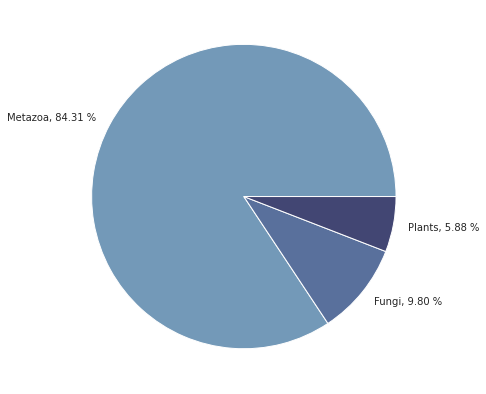

In [ ]:
#SVM FNs kingdom evaluation
plt.figure(figsize=(7,7))
colors = sns.color_palette("ch:start=.2,rot=-.3")[2:5]
percents = svm_fn['Kingdom'].value_counts().to_numpy() * 100 / svm_fn['Kingdom'].value_counts().to_numpy().sum()
legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(svm_fn['Kingdom'].unique(), percents)]
font = {'fontname': 'Times New Roman'}
explode = (0,0,0)

svm_fn['Kingdom'].value_counts().plot(kind='pie', figsize=(7,7), subplots=True, labels=legend, ylabel=' ', colors=colors, legend=False, fontsize=10)
svm_fn['Kingdom'].value_counts()

Metazoa    88
Plants     29
Fungi      21
Other       3
Name: Kingdom, dtype: int64

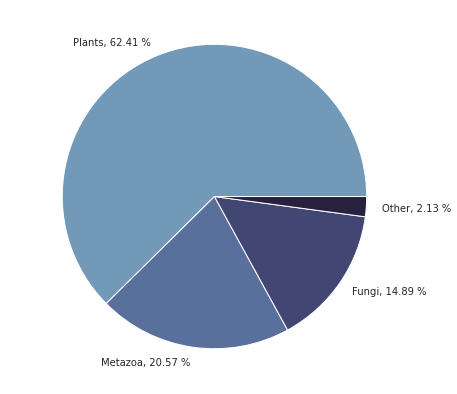

In [ ]:
#SVM TNs kingdom evaluation
svm_tn = svm_class_df.query('Classification=="FP"')['Kingdom']
plt.figure(figsize=(7,7))
colors = sns.color_palette("ch:start=.2,rot=-.3")[2:6]
percents = svm_tn.value_counts().to_numpy() * 100 / svm_tn.value_counts().to_numpy().sum()
legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(svm_tn.unique(), percents)]
font = {'fontname': 'Times New Roman'}
explode = (0,0,0)

svm_tn.value_counts().plot(kind='pie', figsize=(7,7), subplots=True, labels=legend, ylabel=' ', colors=colors, legend=False, fontsize=10)
svm_tn.value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68cf410350>],
      dtype=object)

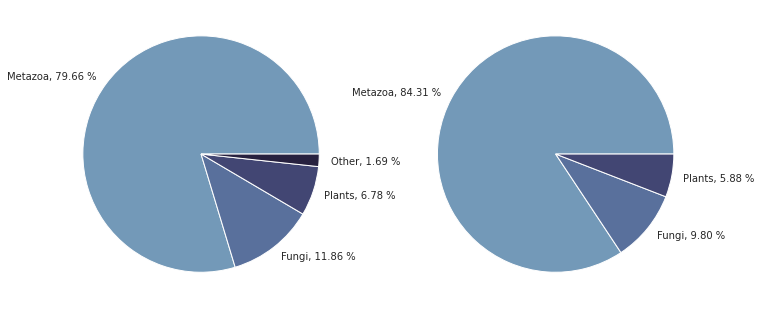

In [ ]:
#both FNs pie chart
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11.65,10)) 

#vh
colors = sns.color_palette("ch:start=.2,rot=-.3")[2:6]
v_percents = vh_fn['Kingdom'].value_counts().to_numpy() * 100 / vh_fn['Kingdom'].value_counts().to_numpy().sum()
v_legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(vh_fn['Kingdom'].unique(), v_percents)]
s_percents = svm_fn['Kingdom'].value_counts().to_numpy() * 100 / svm_fn['Kingdom'].value_counts().to_numpy().sum()
s_legend = ['%s, %1.2f %%' % (idx, percentage) for idx, percentage in zip(svm_fn['Kingdom'].unique(), s_percents)]
font = {'fontname': 'Times New Roman'}
explode = (0,0,0)
vh_fn['Kingdom'].value_counts().plot(kind='pie', figsize=(7,7), subplots=True, labels=v_legend, ylabel=' ', colors=colors, legend=False, fontsize=10, ax=ax1)
svm_fn['Kingdom'].value_counts().plot(kind='pie', figsize=(7,7), subplots=True, labels=s_legend, ylabel=' ', colors=colors, legend=False, fontsize=10, ax=ax2)
